In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle
df = pd.read_csv('spotify.csv')
pd.set_option('display.max_columns',21)
df.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
62866,62866,1bIZxrSkbxatnTo8ObcIxX,Kenshi Yonezu,BOOTLEG,orion,58,281906,False,0.702,0.614,8,-4.930,1,0.0280,0.103000,0.000000,0.2310,0.5070,104.022,4,j-pop
86486,86486,6YeXrQX6jXWJMUHzKnA5Qy,Catupecu Machu,El Mezcal Y La Cobra,Metrópolis Nueva,42,247453,False,0.549,0.881,8,-2.476,1,0.0505,0.067700,0.000000,0.3990,0.4340,130.021,4,punk
72127,72127,6DsILuMLGYN6QqPXlhGHWo,Bullet For My Valentine,Scream Aim Fire,Hearts Burst into Fire,50,297946,True,0.240,0.968,0,-3.669,0,0.1090,0.000996,0.000106,0.1190,0.1190,89.686,4,metalcore
59548,59548,1KceOX4yTiwRHqJFHcmEWp,Eternal Griefs,Blanche Monnier,25 Years of Silence In the Attic,0,922928,False,0.192,0.510,4,-15.102,0,0.0458,0.000194,0.804000,0.0935,0.0753,134.662,4,iranian
19690,19690,61202Zzk9rk4bPMZLh2gr6,Allman Brothers Band,Fiesta temática 60s,Trouble No More,0,227751,False,0.556,0.567,9,-11.426,0,0.0333,0.057700,0.001440,0.0907,0.8560,141.348,4,country


In [2]:
drop_genre = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass','brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'club', 'comedy', 'dance','dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disney', 'drum-and-bass', 'dub', 'dubstep',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'reggae', 'reggaeton', 'rock-n-roll',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish']


In [3]:
sub_df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','popularity','explicit','key','mode','time_signature'])
sub_df.drop(sub_df[sub_df['track_genre'].isin(drop_genre)].index,inplace=True)
sub_df = sub_df.reset_index(drop=True)
sub_df.columns , sub_df.shape , sub_df['track_genre'].unique()

(Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'track_genre'],
       dtype='object'),
 (12000, 11),
 array(['blues', 'classical', 'country', 'disco', 'edm', 'hip-hop', 'jazz',
        'metal', 'pop', 'r-n-b', 'rock', 'world-music'], dtype=object))

In [4]:
X = sub_df[['duration_ms','danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = sub_df[['track_genre']]
cols = X.columns

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction import DictVectorizer
scaler , encoder = StandardScaler(),LabelEncoder()
vectorizer = DictVectorizer(sparse=False)

In [6]:
X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
len(x_train),len(x_test), len(y_train), len(y_test)

(8400, 3600, 8400, 3600)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=13,min_samples_leaf=32)

In [9]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=32)

In [10]:
pickle_out = open("dt_genre_classifier", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [11]:
y_pred = classifier.predict_proba(x_test)
roc_auc_score(y_test, y_pred, multi_class='ovr')

np.float64(0.8338058689819395)

In [12]:
tree_predictions = classifier.predict(x_test)
print(classification_report(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.31      0.17      0.22       330
           1       0.80      0.81      0.80       300
           2       0.38      0.32      0.35       308
           3       0.42      0.53      0.47       296
           4       0.43      0.49      0.46       333
           5       0.46      0.47      0.46       290
           6       0.48      0.61      0.54       276
           7       0.43      0.61      0.51       265
           8       0.24      0.27      0.26       297
           9       0.32      0.25      0.28       306
          10       0.32      0.27      0.29       303
          11       0.56      0.49      0.52       296

    accuracy                           0.43      3600
   macro avg       0.43      0.44      0.43      3600
weighted avg       0.43      0.43      0.43      3600



<Axes: >

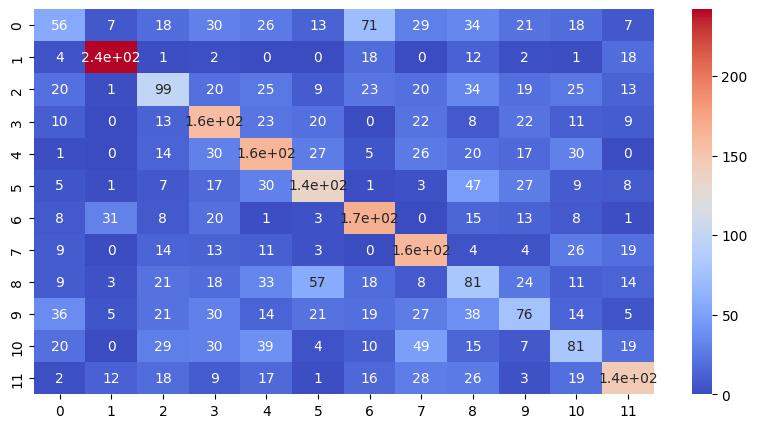

In [13]:
cm = confusion_matrix(y_test,tree_predictions)
plt.figure(figsize=(10,5))
sns.heatmap(cm,cmap='coolwarm',annot=True)

In [14]:
# from sklearn import tree
# plt.figure(figsize=(10,10))
# tree.plot_tree(classifier,filled=True,fontsize=2)

In [15]:
# depth = np.arange(2,30)
# for d in depth:
#     dec_tree = DecisionTreeClassifier(max_depth=d)
#     dec_tree.fit(x_train,y_train)
#     tpred = dec_tree.predict_proba(x_test)
#     print(d,"\t",roc_auc_score(y_test,tpred,multi_class='ovr'))

In [16]:
# score = []
# deep = np.arange(6,14)
# for depth in deep:
#     for samples in [20,25,26,27,30,32,35,37,40]:
#         dec_tree = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=samples)
#         dec_tree.fit(x_train,y_train)
#         tpred = dec_tree.predict_proba(x_test)
#         acc_score = roc_auc_score(y_test,tpred,multi_class='ovr')
#         score.append((depth,samples,acc_score))

In [17]:
# cols = ['max depth','min_samples_leaf','accuracy']
# score_df = pd.DataFrame(score,columns=cols)
# df_scores_pivot = score_df.pivot(index='min_samples_leaf', columns=['max depth'], values=['accuracy'])
# df_scores_pivot

depth=13 min_samples_leaf=32 acc=83.394